In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.isna().any().any()

True

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
data.isna().any().any()

False

In [9]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

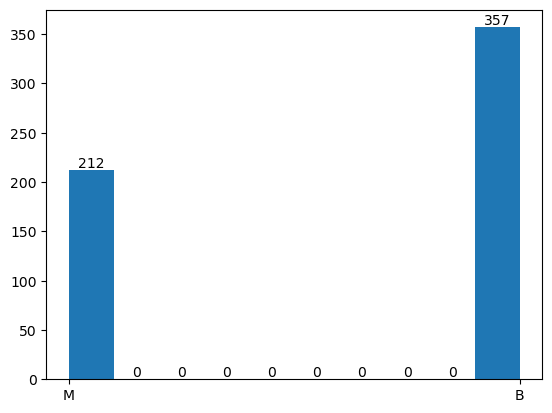

In [10]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [11]:
Y.replace('B', 0, inplace=True)

In [12]:
Y.replace('M', 1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [15]:
X_train.shape

(426, 30)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
def report(model, x, y, text="train"):
    print(f'{text}\t |\t {type(model).__name__}')
    print('-'*60)
    print(classification_report(y, model.predict(x)))
    print('-'*60)
    print(pd.DataFrame(confusion_matrix(y, model.predict(x)), index=['B', 'M'], columns=['B', 'M']))

In [18]:
from sklearn.tree import plot_tree

In [19]:
def treePlot(model, feature_names, class_names):
    plt.figure(figsize=(40,40))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True,
             rounded=True, impurity=True, proportion=True)
    plt.show()

In [20]:
feature_names = X.columns

In [21]:
class_names = ['B', 'M']

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# default parameters for model
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
report(model, X_train, y_train)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [26]:
report(model, X_test, y_test)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        90
           1       0.94      0.87      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

------------------------------------------------------------
    B   M
B  87   3
M   7  46


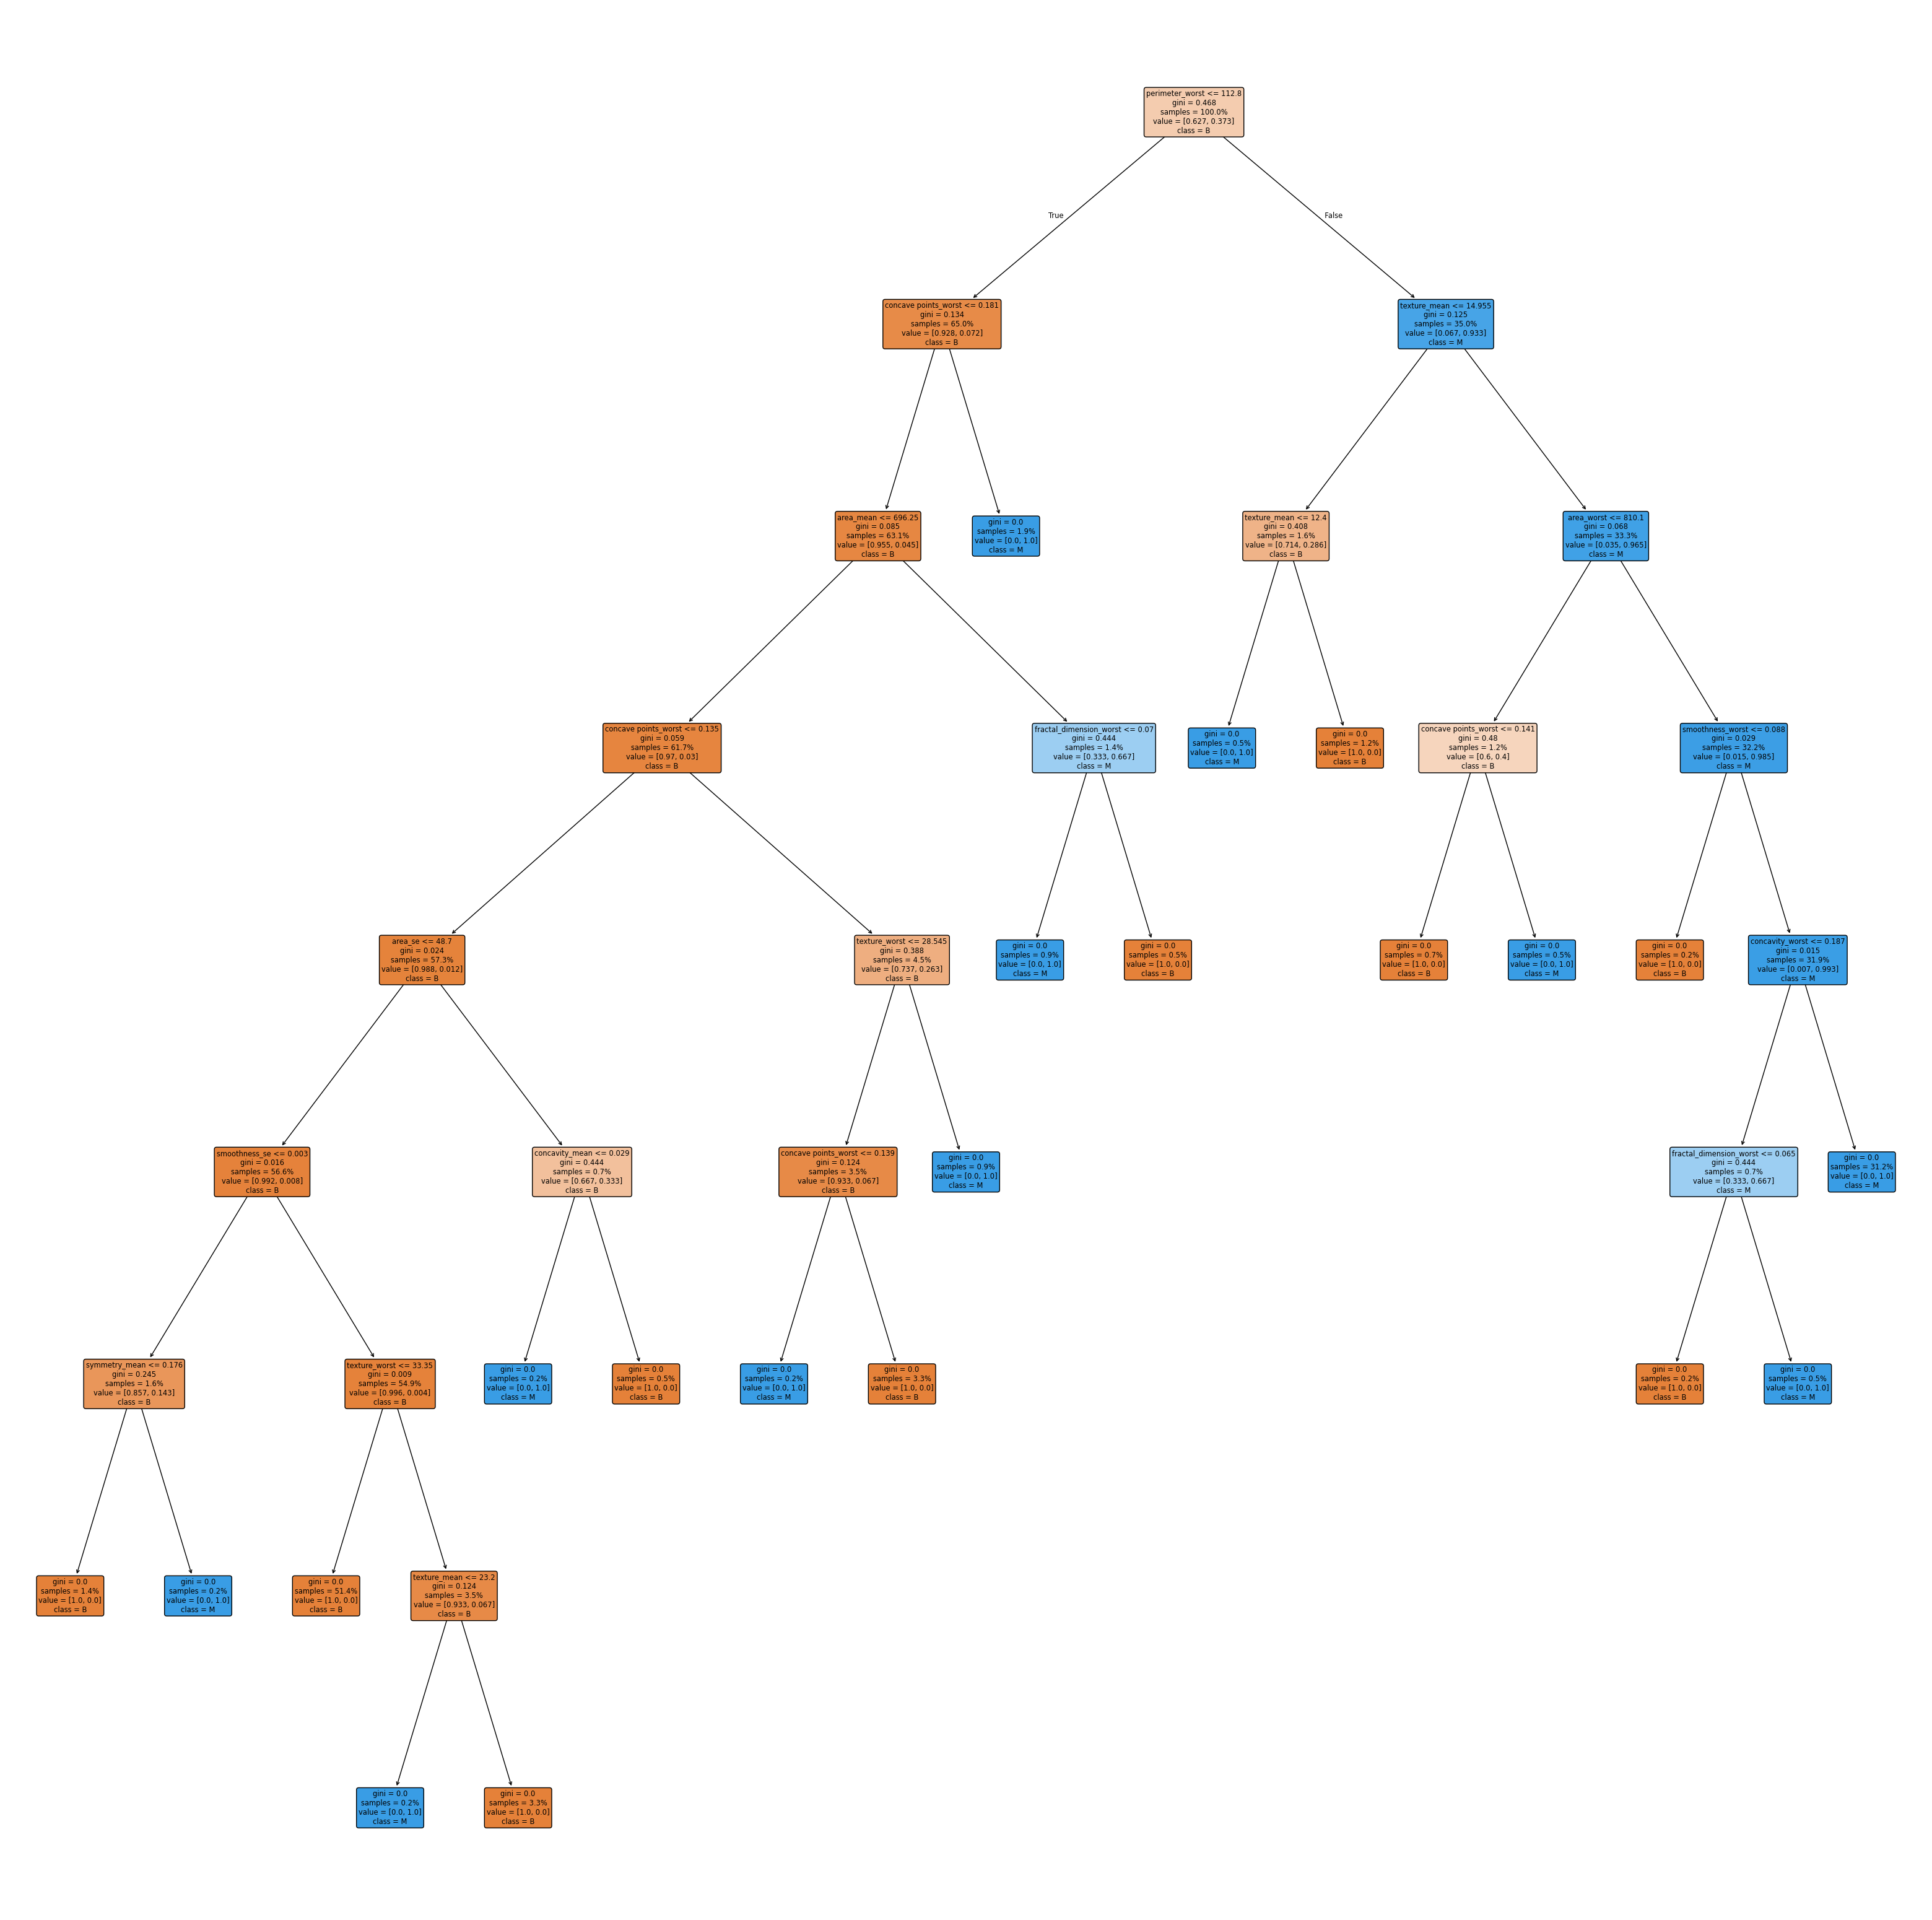

In [27]:
treePlot(model, feature_names, class_names)

In [28]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
report(model, X_train, y_train)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

------------------------------------------------------------
     B    M
B  266    1
M    8  151


In [31]:
report(model, X_test, y_test)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        90
           1       0.97      0.74      0.84        53

    accuracy                           0.90       143
   macro avg       0.92      0.86      0.88       143
weighted avg       0.91      0.90      0.89       143

------------------------------------------------------------
    B   M
B  89   1
M  14  39


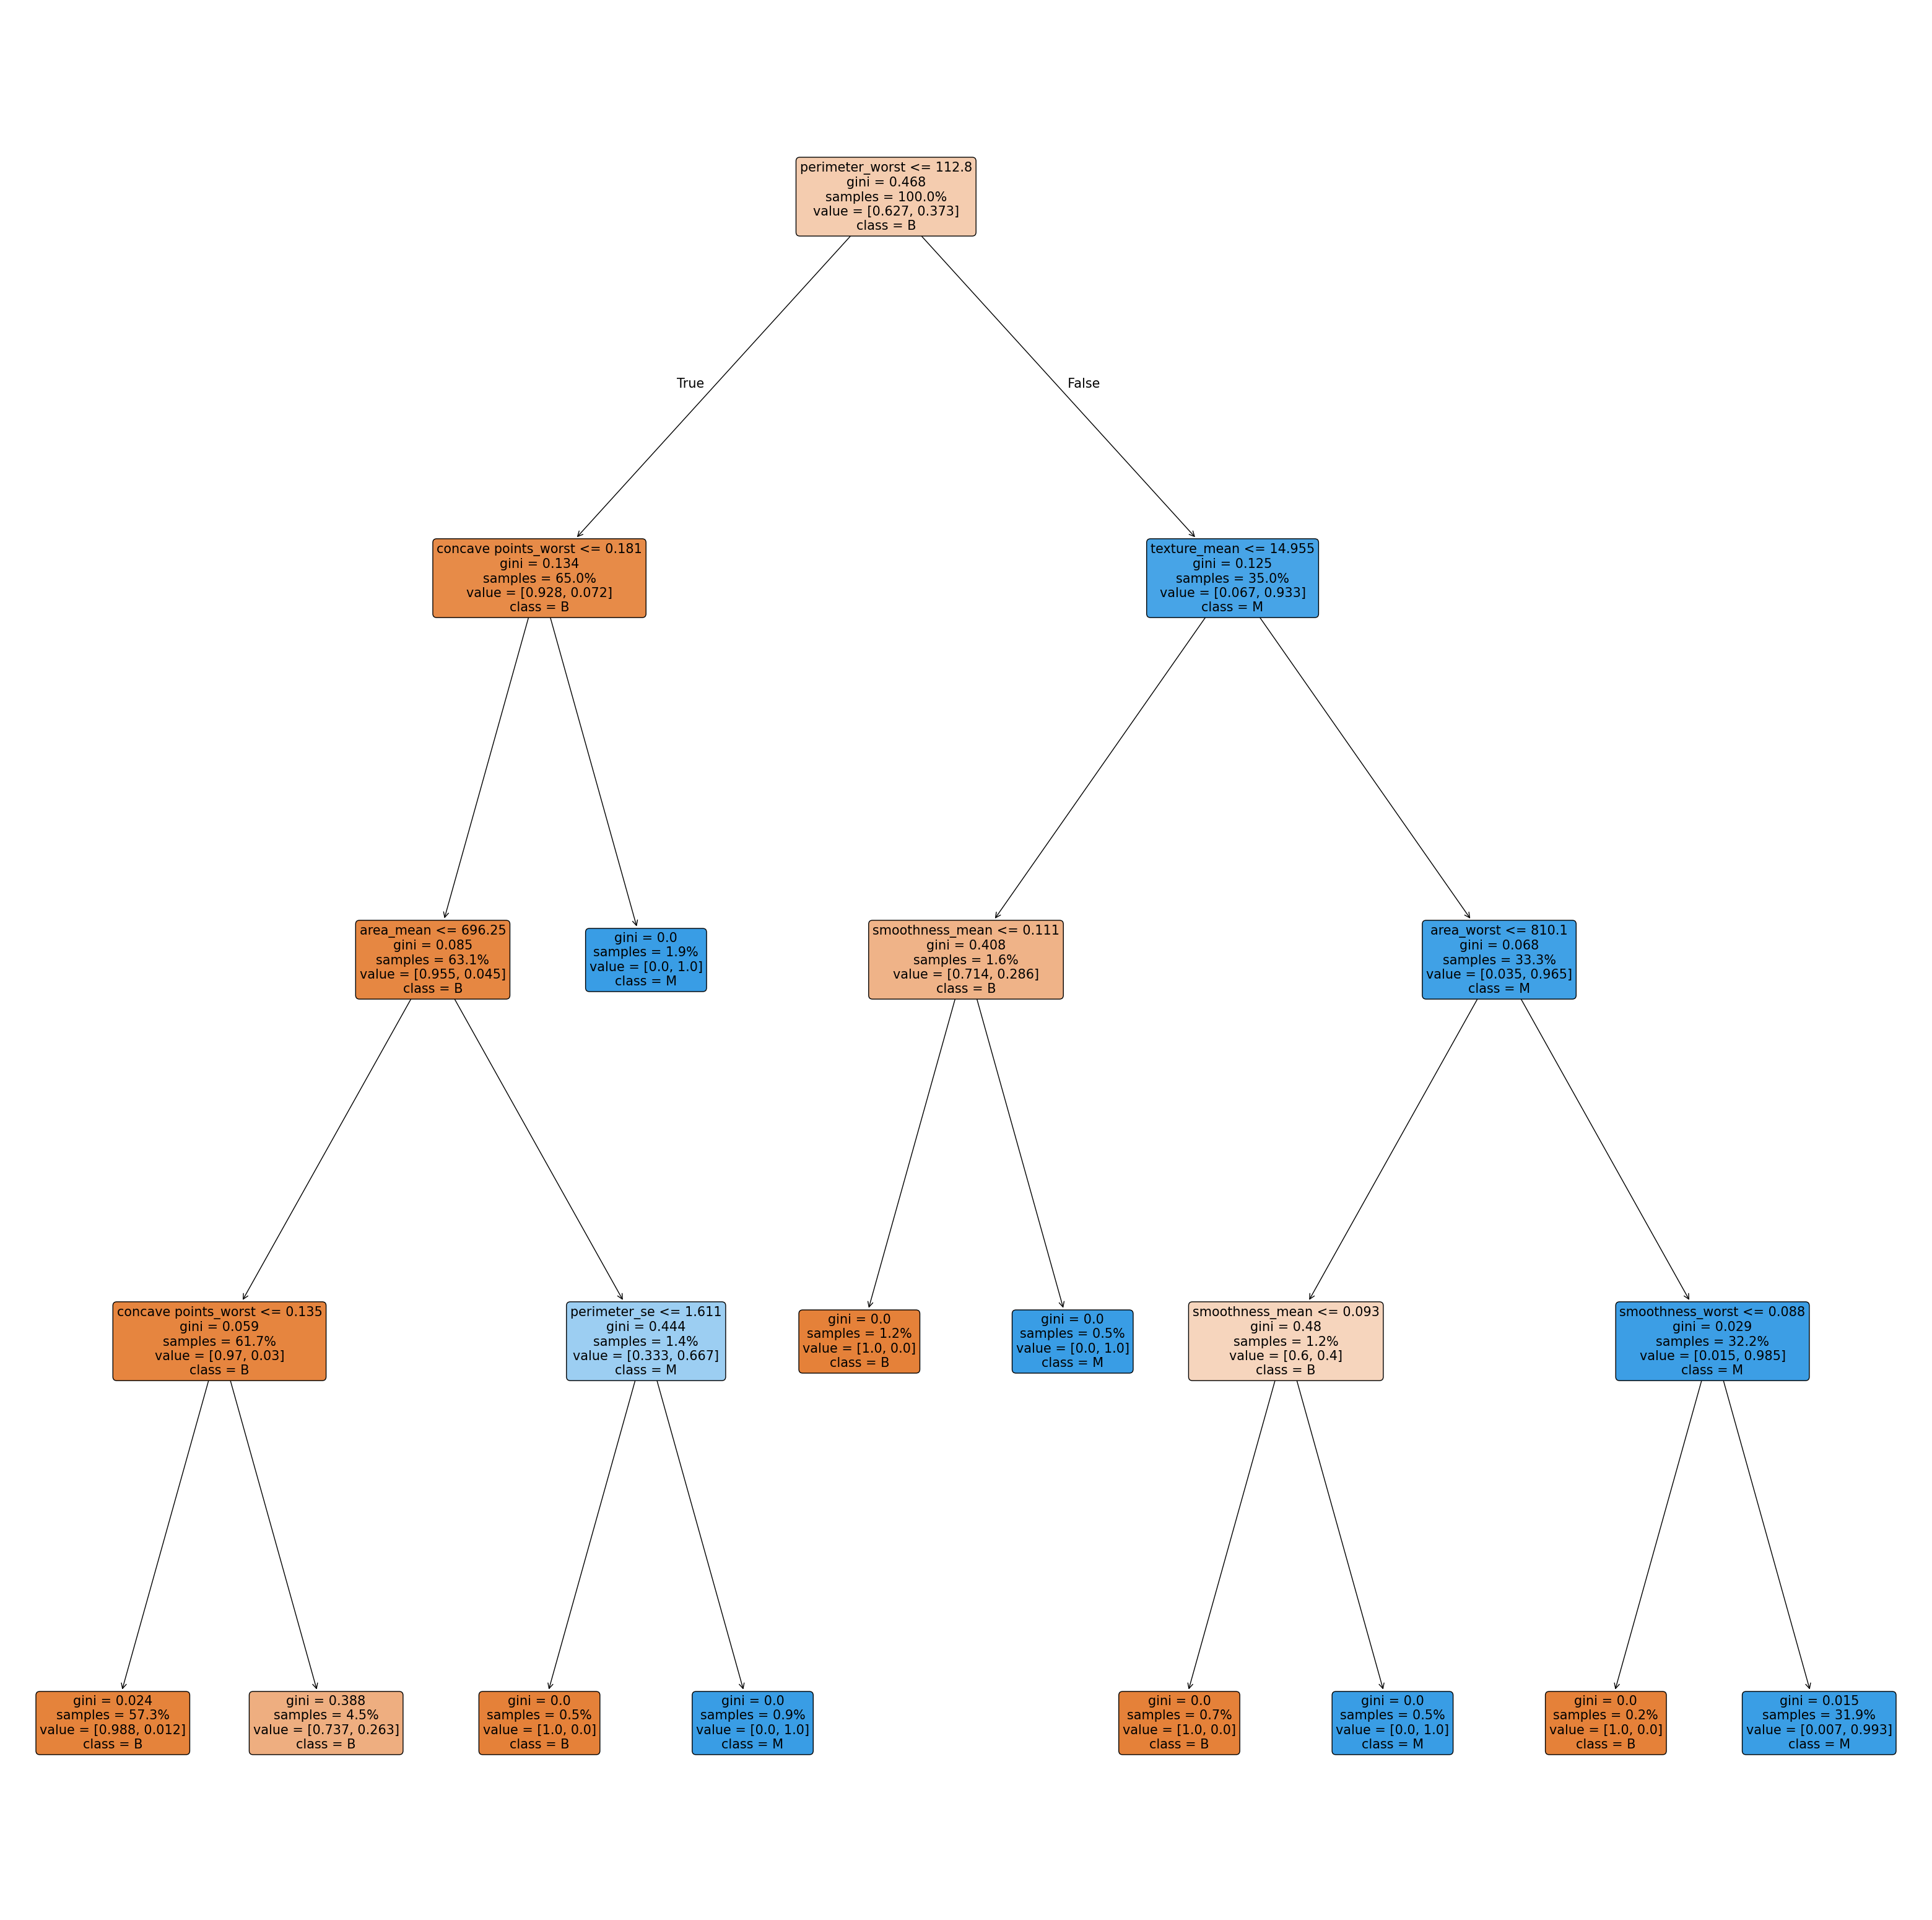

In [32]:
treePlot(model, feature_names, class_names)

In [33]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy', min_samples_split=25)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=25)

In [35]:
report(model, X_train, y_train)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       267
           1       0.96      0.97      0.97       159

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426

------------------------------------------------------------
     B    M
B  260    7
M    4  155


In [36]:
report(model, X_test, y_test)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

------------------------------------------------------------
    B   M
B  88   2
M   6  47


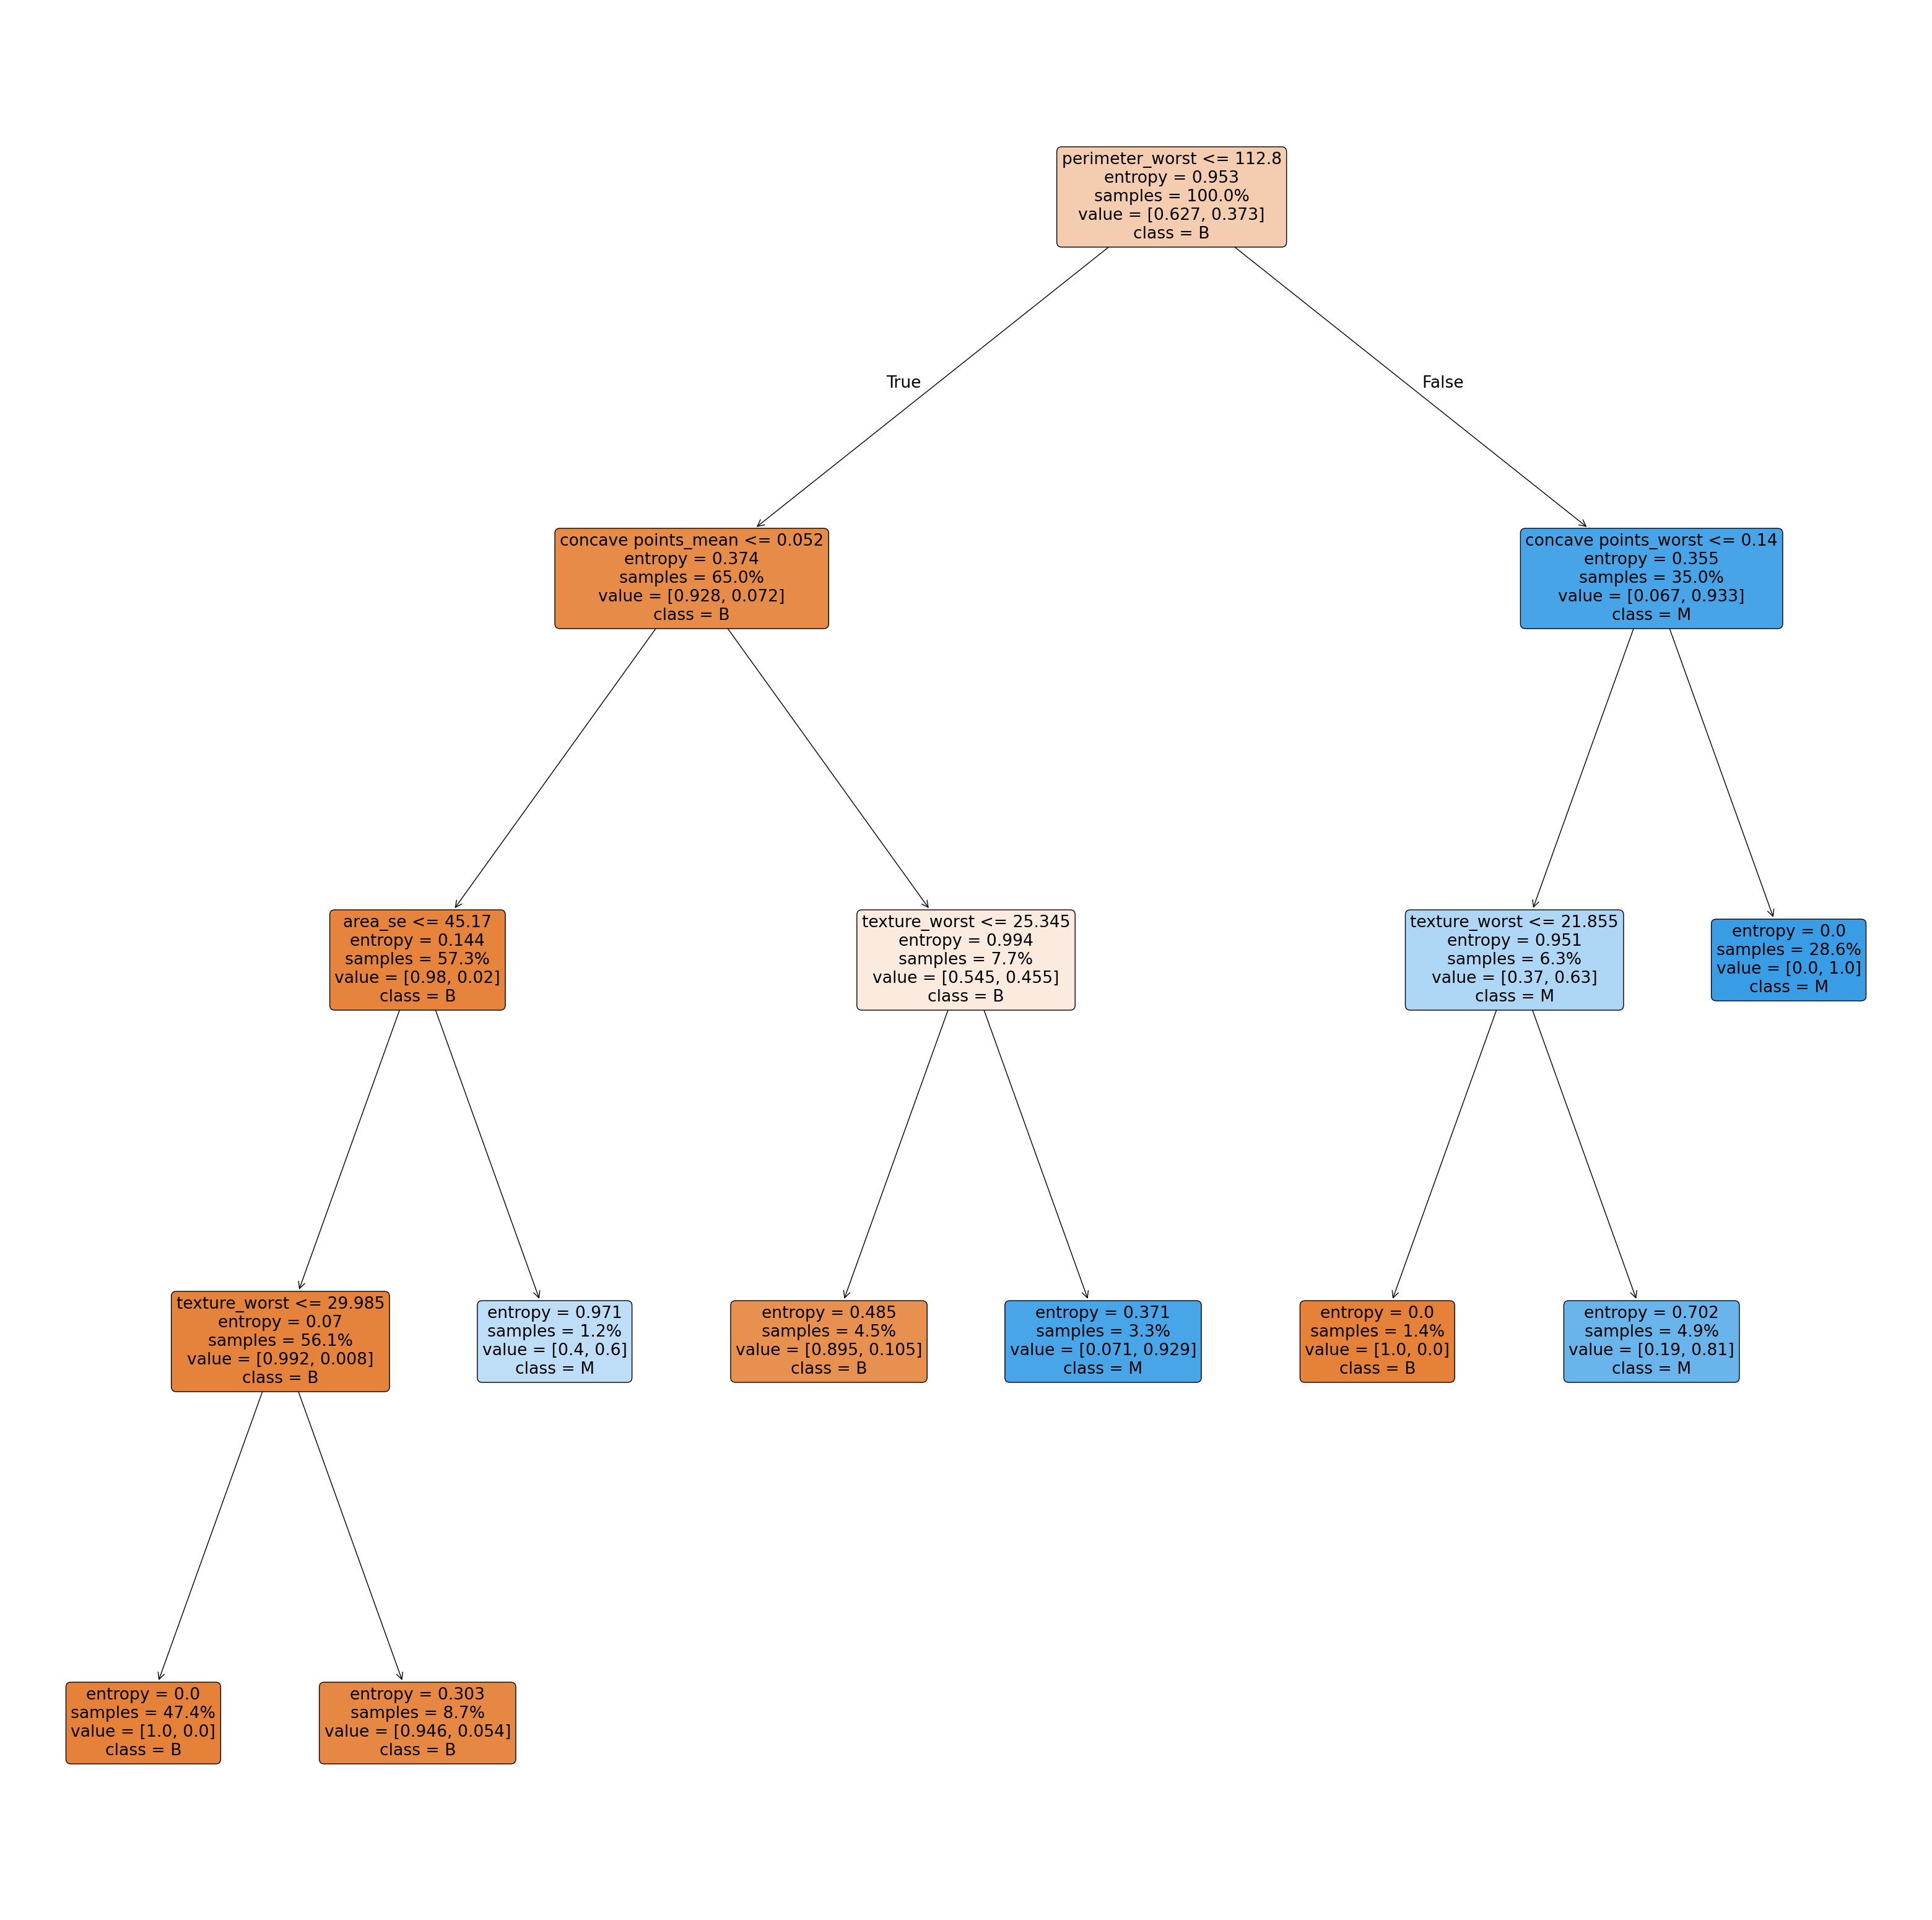

In [37]:
treePlot(model, feature_names, class_names)

In [38]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,6,8,10]
}

In [45]:
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, verbose=10)

In [46]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 1/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.907 total time=   0.0s
[CV 2/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 2/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.976 total time=   0.0s
[CV 3/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 3/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.906 total time=   0.0s
[CV 4/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 4/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.906 total time=   0.0s
[CV 5/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 5/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.882 total time=   0.0s
[CV 1/5; 2/8] START criterion=gini, max_depth=6.................................
[CV 1/5; 2/8] END ..criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10]},
             verbose=10)

In [47]:
estimator.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
model = estimator.best_estimator_

In [49]:
report(model, X_train, y_train)

train	 |	 DecisionTreeClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       1.00      0.94      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

------------------------------------------------------------
     B    M
B  267    0
M    9  150


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_split=25)

In [52]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=25)

In [53]:
report(model, X_train, y_train)

train	 |	 RandomForestClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       267
           1       0.97      0.94      0.96       159

    accuracy                           0.97       426
   macro avg       0.97      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426

------------------------------------------------------------
     B    M
B  263    4
M    9  150


In [54]:
report(model, X_test, y_test, 'test')

test	 |	 RandomForestClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

------------------------------------------------------------
    B   M
B  89   1
M   6  47


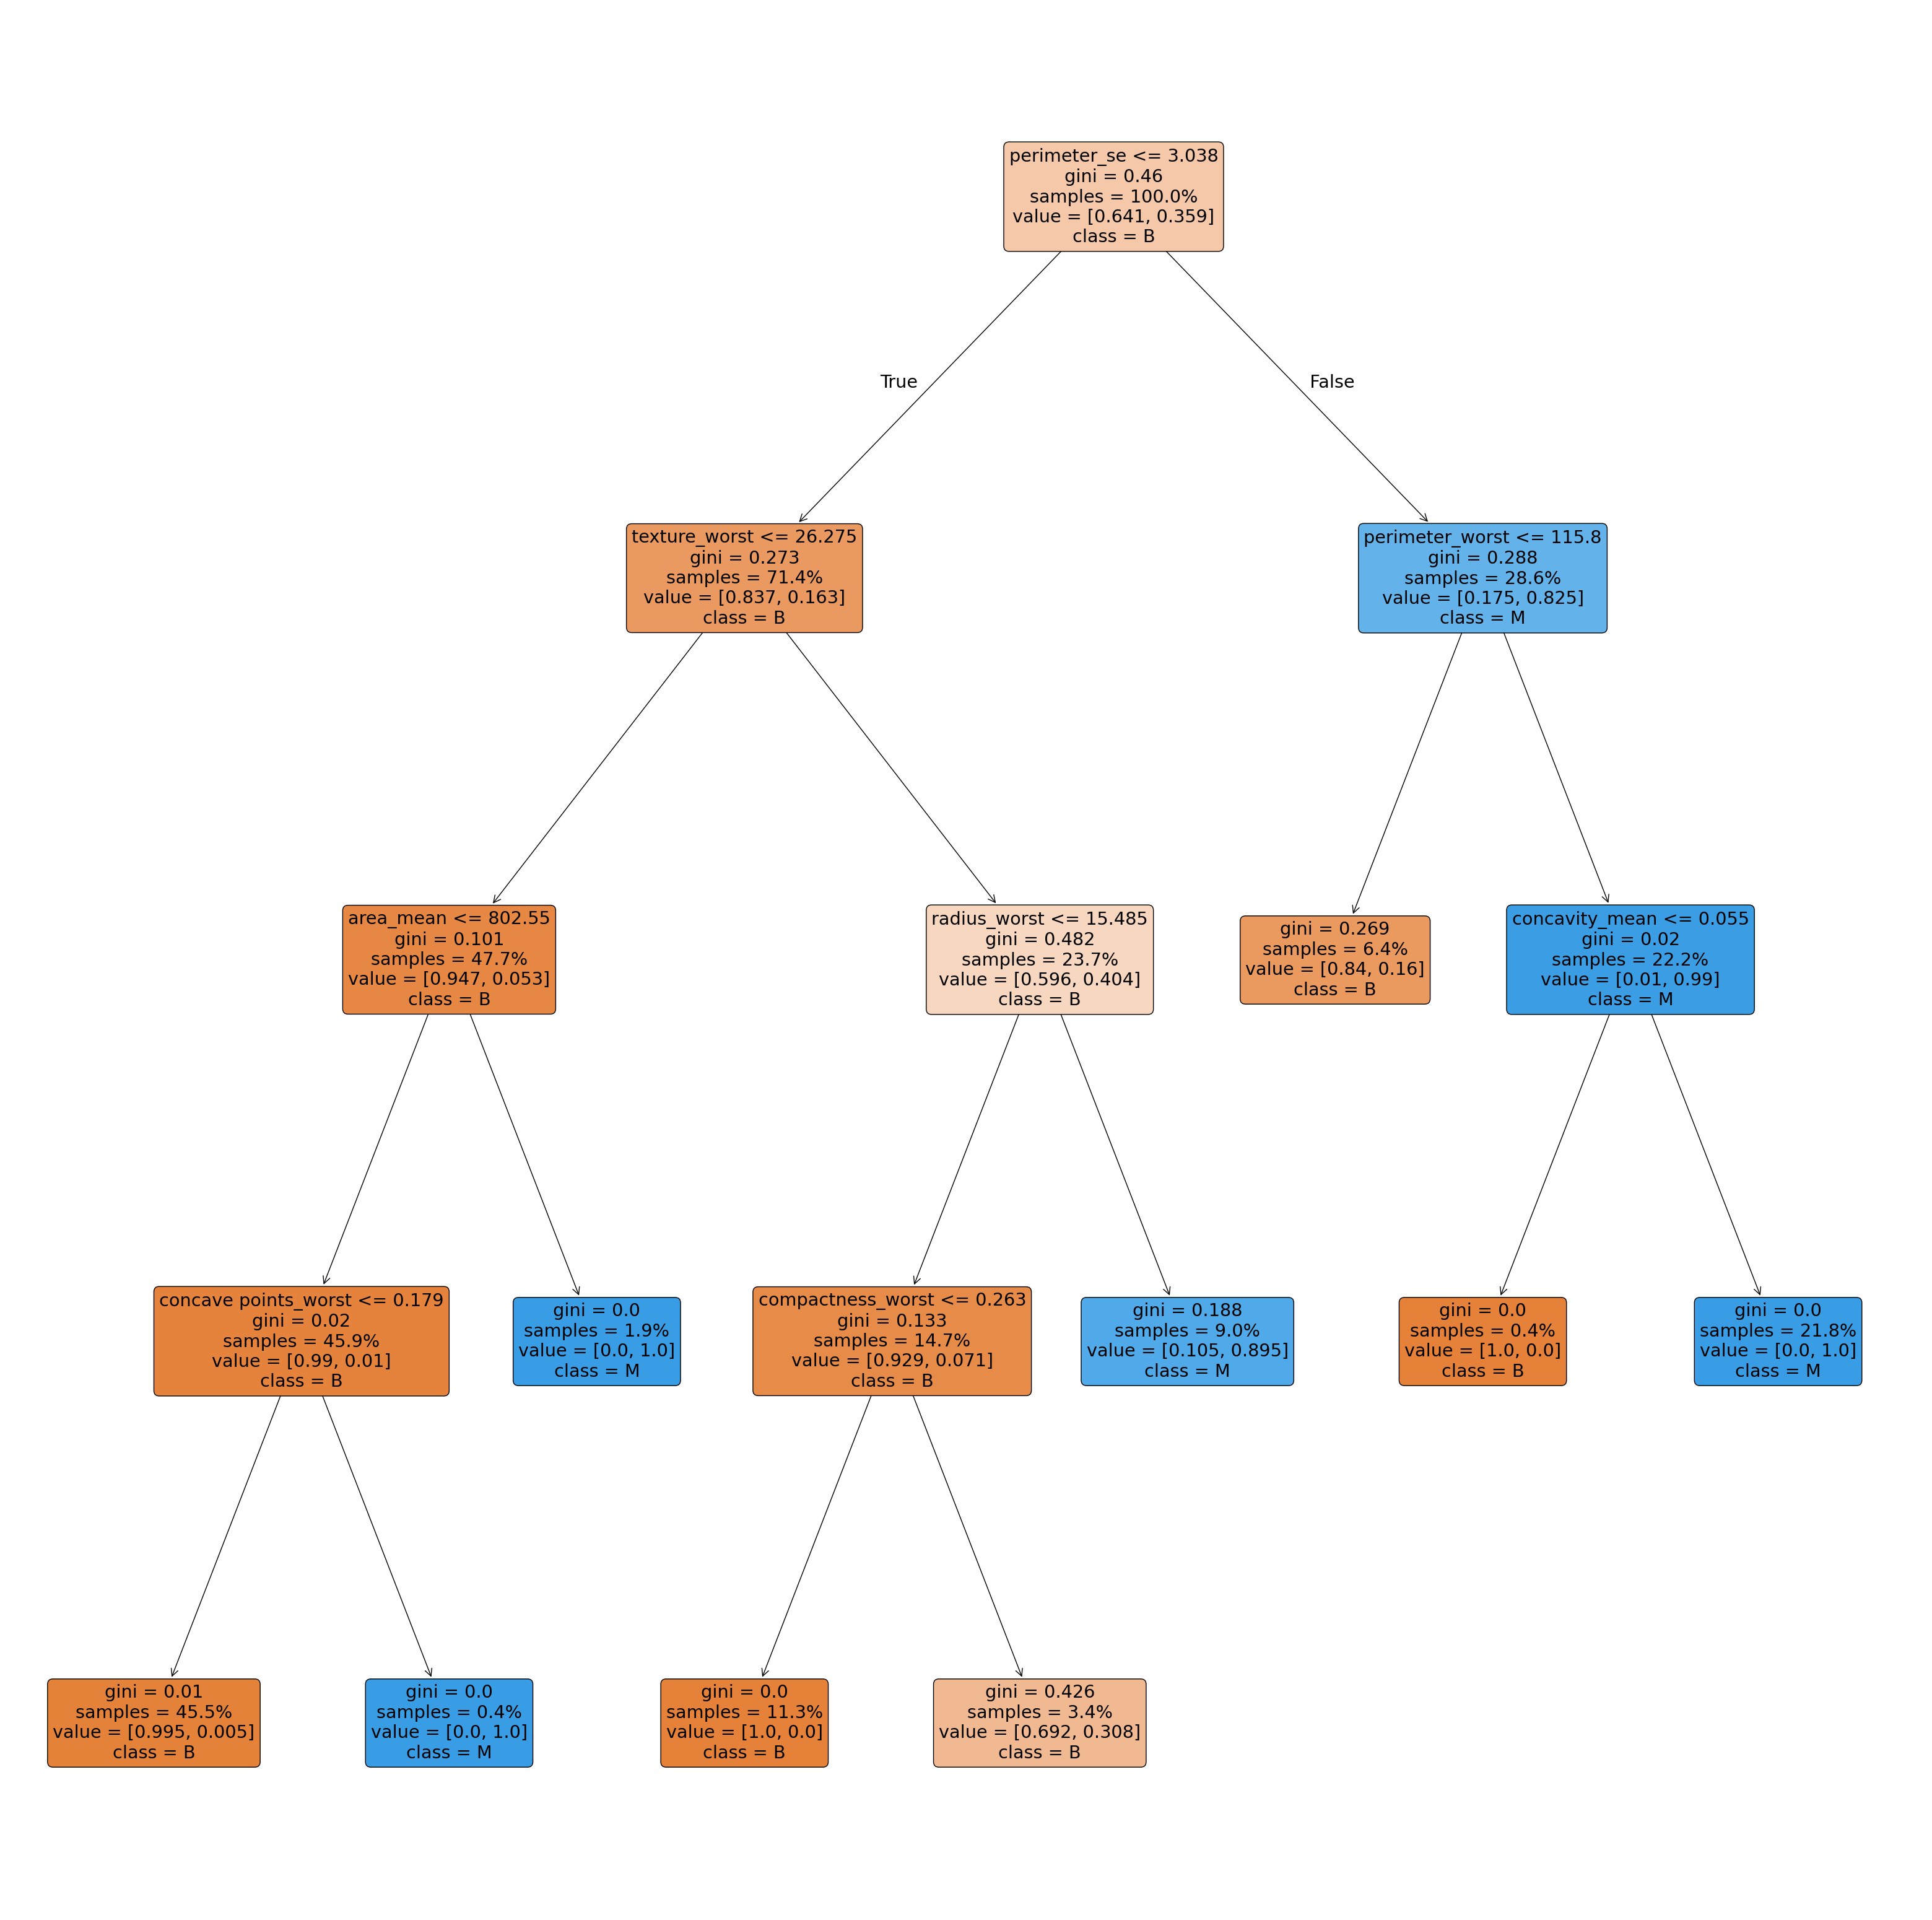

In [56]:
treePlot(model.estimators_[0], feature_names, class_names)

In [57]:
estimator = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, verbose=10)

In [59]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 1/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.977 total time=   0.1s
[CV 2/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 2/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.965 total time=   0.1s
[CV 3/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 3/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.953 total time=   0.1s
[CV 4/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 4/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.976 total time=   0.1s
[CV 5/5; 1/8] START criterion=gini, max_depth=4.................................
[CV 5/5; 1/8] END ..criterion=gini, max_depth=4;, score=0.929 total time=   0.1s
[CV 1/5; 2/8] START criterion=gini, max_depth=6.................................
[CV 1/5; 2/8] END ..criterion=gini, max_depth=6;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10]},
             verbose=10)

In [60]:
estimator.best_estimator_

RandomForestClassifier(max_depth=4)

In [61]:
model = estimator.best_estimator_

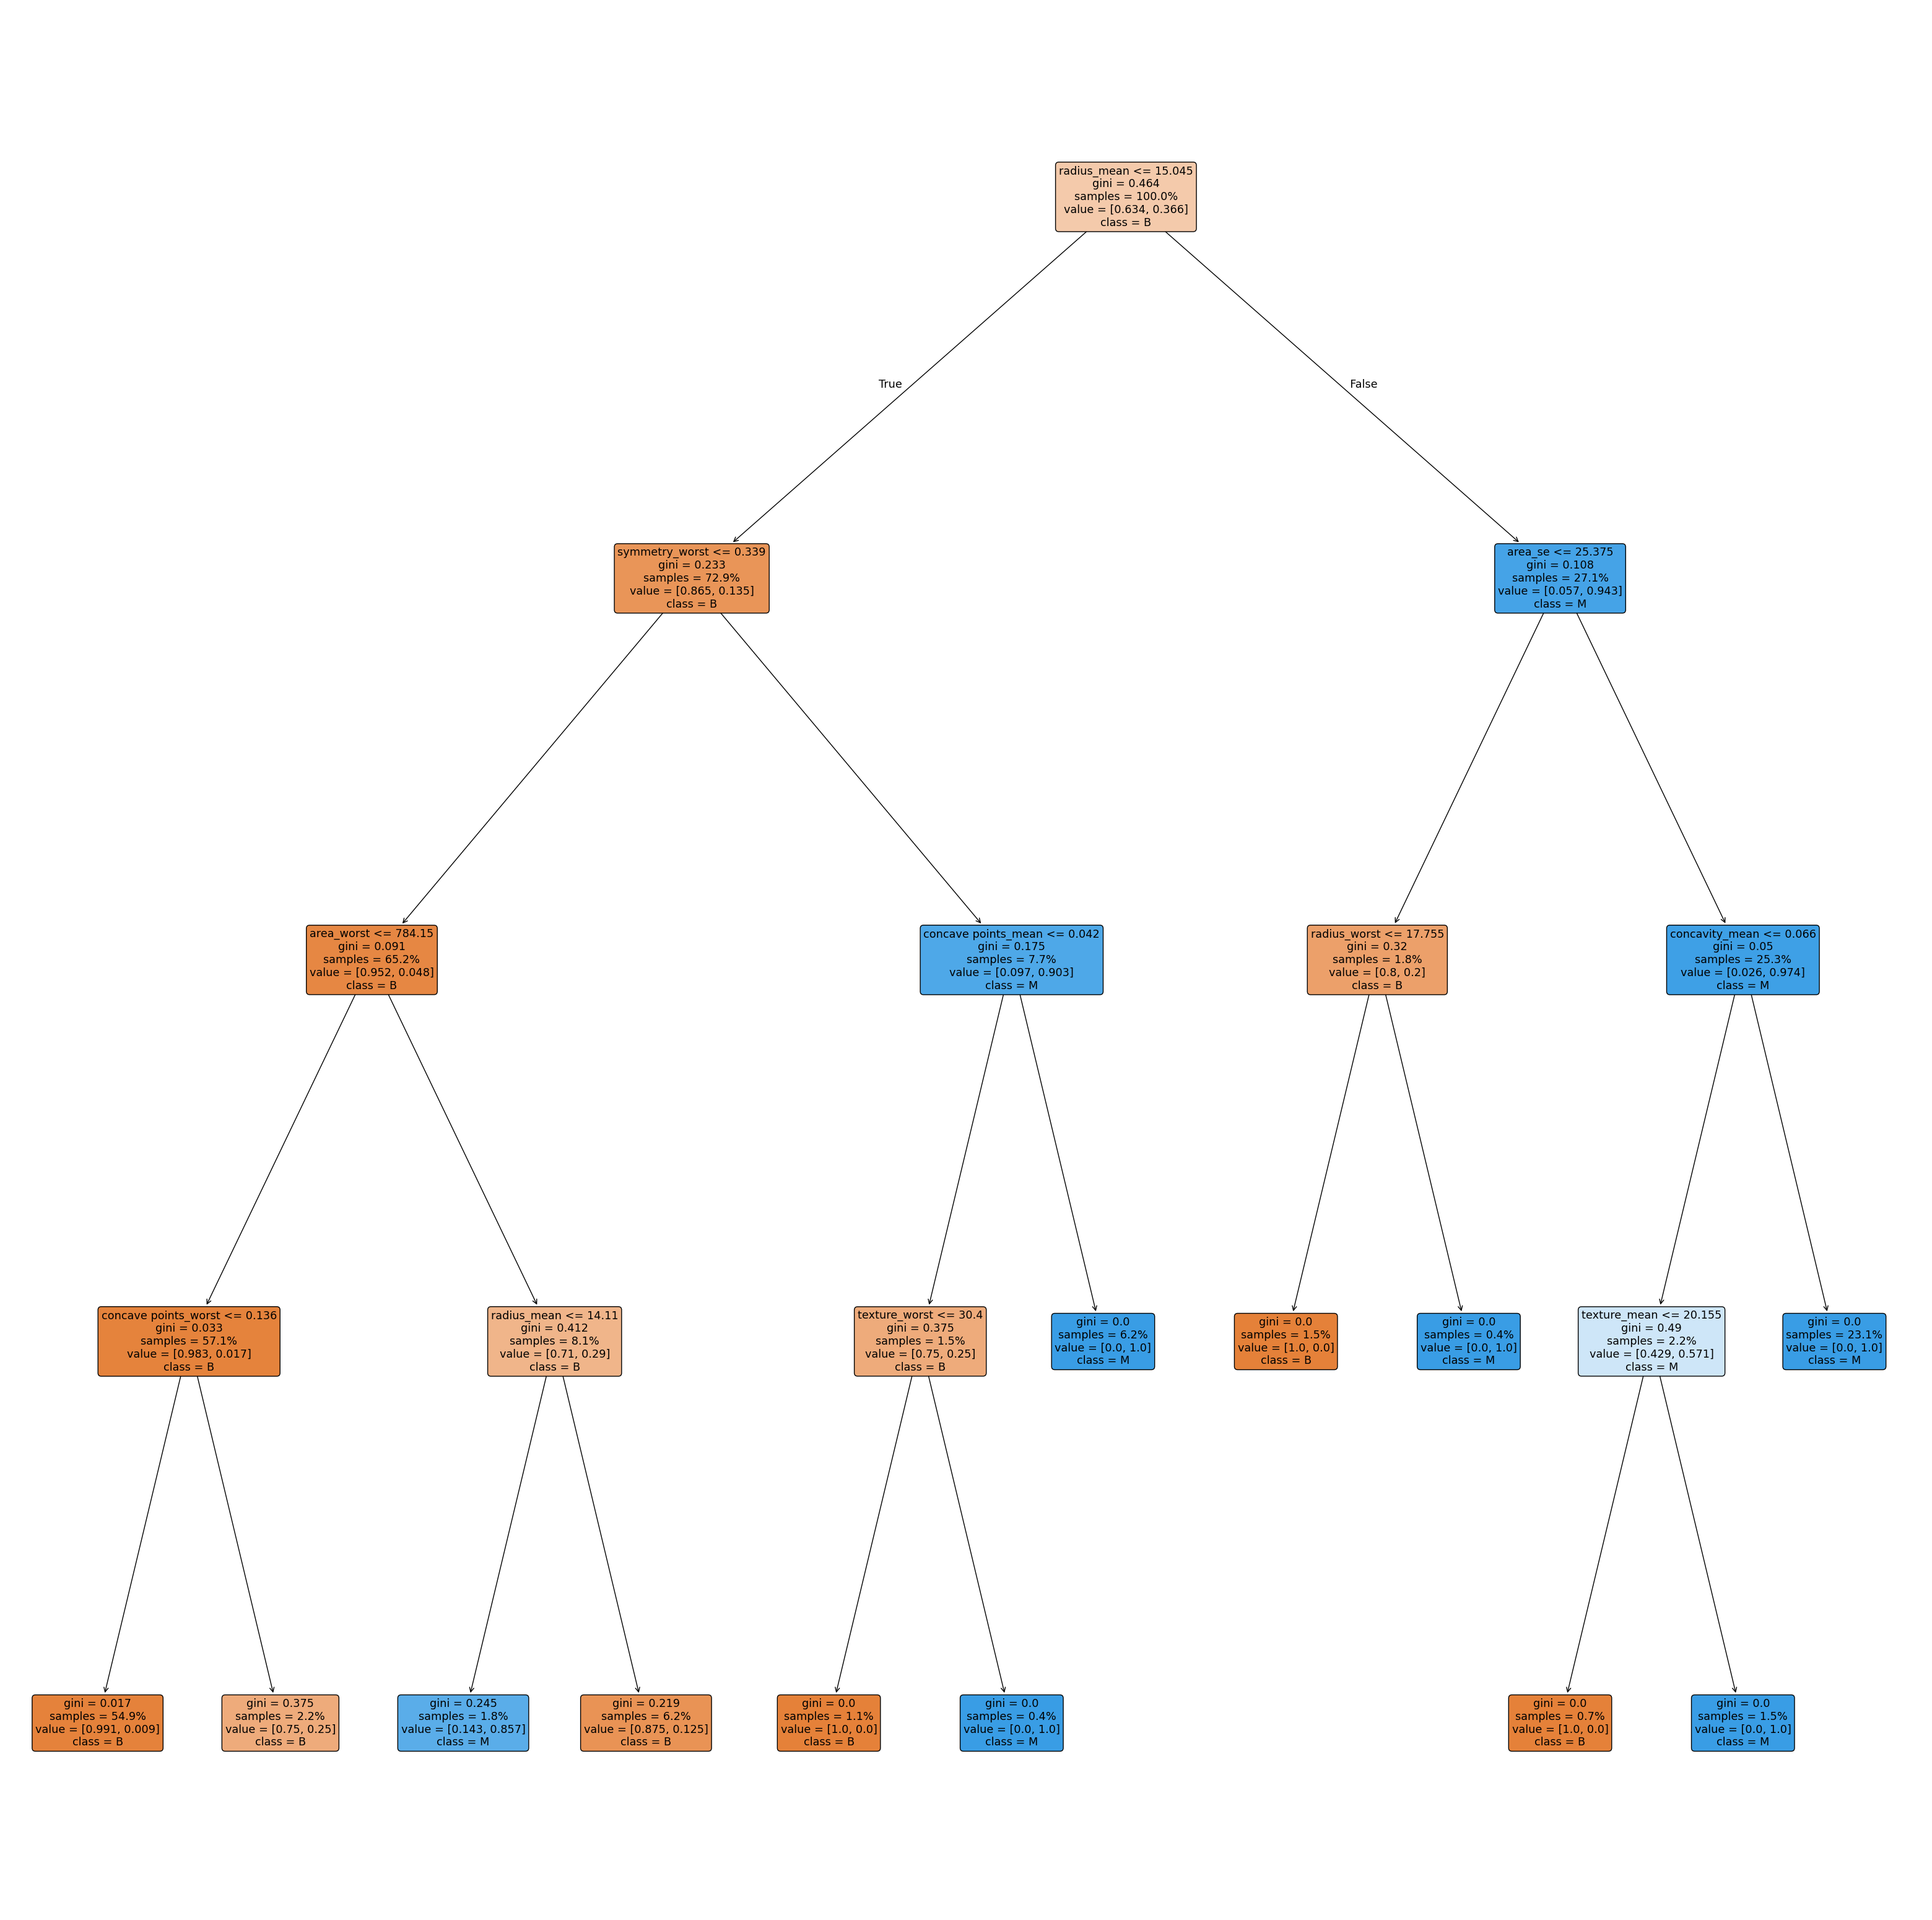

In [62]:
treePlot(model.estimators_[0], feature_names, class_names)

In [63]:
report(model, X_train, y_train)

train	 |	 RandomForestClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.97      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

------------------------------------------------------------
     B    M
B  267    0
M    4  155


In [64]:
report(model, X_test, y_test)

train	 |	 RandomForestClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

------------------------------------------------------------
    B   M
B  90   0
M   5  48
